<a href="https://colab.research.google.com/github/2220094/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題3

## 構想案

一定の大きさの画像を作成し縦と横に長さの目安となる目盛りを作り、そこにランダムで図形を生成する。

ユーザーはそれを参考にその位置を推定し、座標などを打ち込むといったクイズを作る。

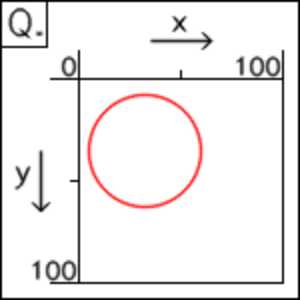


上の枠内に表示されている赤色の円について、
次の値を予想して入力してください。（半角数字で入力）

円の半径：15
円の中心のｘ座標：30
円の中心のｙ座標：30


答え合わせです。



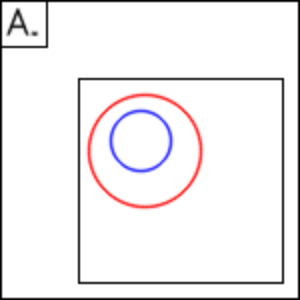


青色の円はあなたの解答に基づいて作られました。

正解は、
円の半径：28
円の中心のｘ座標：32
円の中心のｙ座標：35

でした。


In [79]:
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow



# 基本情報
q_size = 100
q_s = q_size

frame_size = 150
f_s = frame_size



### お題を表示するための貼り付けもとになる画像

## 基礎
q_frame = np.zeros( (f_s, f_s, 3), np.uint8 )
q_frame.fill( 255 )
cv2.rectangle(q_frame, (0, 0), (f_s-1, f_s-1), color=(0, 0, 0))

# Q.
cv2.putText(q_frame,text='Q.',org=(3, 17),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.6,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)
cv2.rectangle(q_frame, (0, 0), (23, 23), color=(0, 0, 0))


## お題を表示する部分の枠
cv2.rectangle(q_frame, (39, 39), (41+q_s, 41+q_s), color=(0, 0, 0))


## 目盛り

# x
cv2.arrowedLine(q_frame,(75, 20),(105, 20),color=(0, 0, 0),thickness=1,
                line_type=cv2.LINE_AA,shift=0,tipLength=0.2)
cv2.putText(q_frame,text='x',org=(85, 15),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.5,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)

# y
cv2.arrowedLine(q_frame,(20, 75),(20, 105),color=(0, 0, 0),thickness=1,
                line_type=cv2.LINE_AA,shift=0,tipLength=0.2)
cv2.putText(q_frame,text='y',org=(7, 90),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.5,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)

# 0
cv2.line(q_frame,(39, 25),(39, 39),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)
cv2.line(q_frame,(25, 39),(39, 39),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)
cv2.putText(q_frame,text='0',org=(30, 37),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.4,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)

# 100
cv2.line(q_frame,(41+q_s, 25),(41+q_s, 41),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)
cv2.line(q_frame,(25, 41+q_s),(41, 41+q_s),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)
cv2.putText(q_frame,text='100',org=(16+q_s, 37),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.4,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)
cv2.putText(q_frame,text='100',org=(14, 39+q_s),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.4,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)

# 50
cv2.line(q_frame,(40+50, 35),(40+50, 40),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)
cv2.line(q_frame,(35, 40+50),(40, 40+50),color=(0, 0, 0),
         thickness=1,lineType=cv2.LINE_4,shift=0)



### お題となる画像の作成と表示

## 基礎
q = np.zeros( (q_s, q_s, 3), np.uint8 )
q.fill( 255 )


## お題の生成

# 円
r_max = 30
r_min = 15

circle_radius = np.random.randint(r_min,r_max)
c_r = circle_radius

circle_center_x = np.random.randint(r_max,q_s-r_max)
c_x = circle_center_x

circle_center_y = np.random.randint(r_max,q_s-r_max)
c_y = circle_center_y

cv2.circle(q,center=(c_x, c_y),radius=c_r,color=(0, 0, 255),
           thickness=1,lineType=cv2.LINE_AA,shift=0)


## 貼り付け
q_frame[40:40+q_s, 40:40+q_s] = q



### お題を拡大表示するための画像を作成

x = 3  # 拡大倍率
q_see = cv2.resize( q_frame, (int(q_s*x), int(q_s*x)) )



### お題の表示
cv2_imshow(q_see)



### クイズ
print()
print('上の枠内に表示されている赤色の円について、')
print('次の値を予想して入力してください。（半角数字で入力）')
print()
q_r = int(input('円の半径：'))
q_x = int(input('円の中心のｘ座標：'))
q_y = int(input('円の中心のｙ座標：'))

print()
print()

### 答え合わせ

print('答え合わせです。')
print()

## お題と解答を比較する画像の作成
a = q
cv2.circle(a,center=(q_x, q_y),radius=q_r,color=(255, 0, 0),
           thickness=1,lineType=cv2.LINE_AA,shift=0)

a_frame = np.zeros( (f_s, f_s, 3), np.uint8 )
a_frame.fill( 255 )
cv2.rectangle(a_frame, (0, 0), (f_s-1, f_s-1), color=(0, 0, 0))

cv2.putText(a_frame,text='A.',org=(3, 17),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.6,color=(0, 0, 0),thickness=1,lineType=cv2.LINE_AA)
cv2.rectangle(a_frame, (0, 0), (23, 23), color=(0, 0, 0))

cv2.rectangle(a_frame, (39, 39), (41+q_s, 41+q_s), color=(0, 0, 0))

a_frame[40:40+q_s, 40:40+q_s] = a

a_see = cv2.resize( a_frame, (int(q_s*x), int(q_s*x)) )

cv2_imshow(a_see)

print()
print('青色の円はあなたの解答に基づいて作られました。')
print()

if q_r == c_r and q_x == c_x and q_y == c_y :
  print('全問正解！！すごい！！')
  print()

print('正解は、')
print(f'円の半径：{c_r}')
print(f'円の中心のｘ座標：{c_x}')
print(f'円の中心のｙ座標：{c_y}')
print()
print('でした。')